<a href="https://colab.research.google.com/github/benvekedim/Clustering/blob/main/Birch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#Birch
from sklearn.cluster import Birch

#data
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data[:, [2,3]]

#model
model =  Birch(threshold=0.01, n_clusters=3)

# fit and predict
prediction = model.fit_predict(data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

In [61]:
clusters = np.unique(prediction)
clusters

array([0, 1, 2])

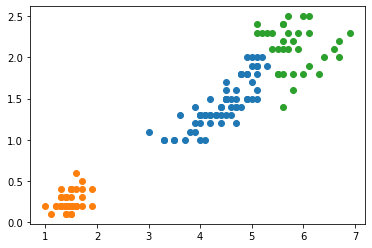

In [62]:
for cluster in clusters:
  row_ix = np.where(prediction==cluster)
  plt.scatter(data[row_ix,0],data[row_ix,1])
plt.show()

In [63]:
#silhouette_score

from sklearn.metrics import silhouette_score
score = silhouette_score(X=data,labels=prediction)
score

0.6502470698742773

In [45]:
thresholds = np.arange(0,100)/100
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [47]:
sil_score = []
for i in thresholds:
  model = Birch(threshold = i)
  prediction = model.fit_predict(data)
  score = silhouette_score(X=data,labels=prediction)
  sil_score.append(score)

#print(sil_score)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


In [55]:
#score yükseldi ama irisi 2 kümeye ayırdık.Hatalı.
# k bilindiği durumda, silhouette_score yüksekliği bizi
#yanılatabilir
thres_sil_score = np.array(sorted(list(zip(thresholds,sil_score))))
thres_sil_score[90:]

array([[0.9       , 0.65411757],
       [0.91      , 0.65411757],
       [0.92      , 0.65411757],
       [0.93      , 0.65411757],
       [0.94      , 0.65411757],
       [0.95      , 0.65411757],
       [0.96      , 0.65411757],
       [0.97      , 0.75609261],
       [0.98      , 0.75609261],
       [0.99      , 0.75609261]])

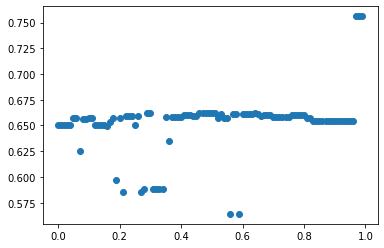

In [51]:
plt.scatter(thres_sil_score[:,0],thres_sil_score[:,1])